<a href="https://colab.research.google.com/github/raulbenitez/introAI_ICE/blob/main/DBSCAN_pinguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

carregar dades

In [2]:
import seaborn as sns

df = sns.load_dataset('penguins') # load data
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

eliminar NaNs

In [3]:
df1 = df.copy()
df1.dropna(inplace=True) # eliminem els pingüins amb algun NaN
df1.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [4]:
df1.shape

(333, 7)

Representar gràficament pariplot


<Figure size 640x480 with 0 Axes>

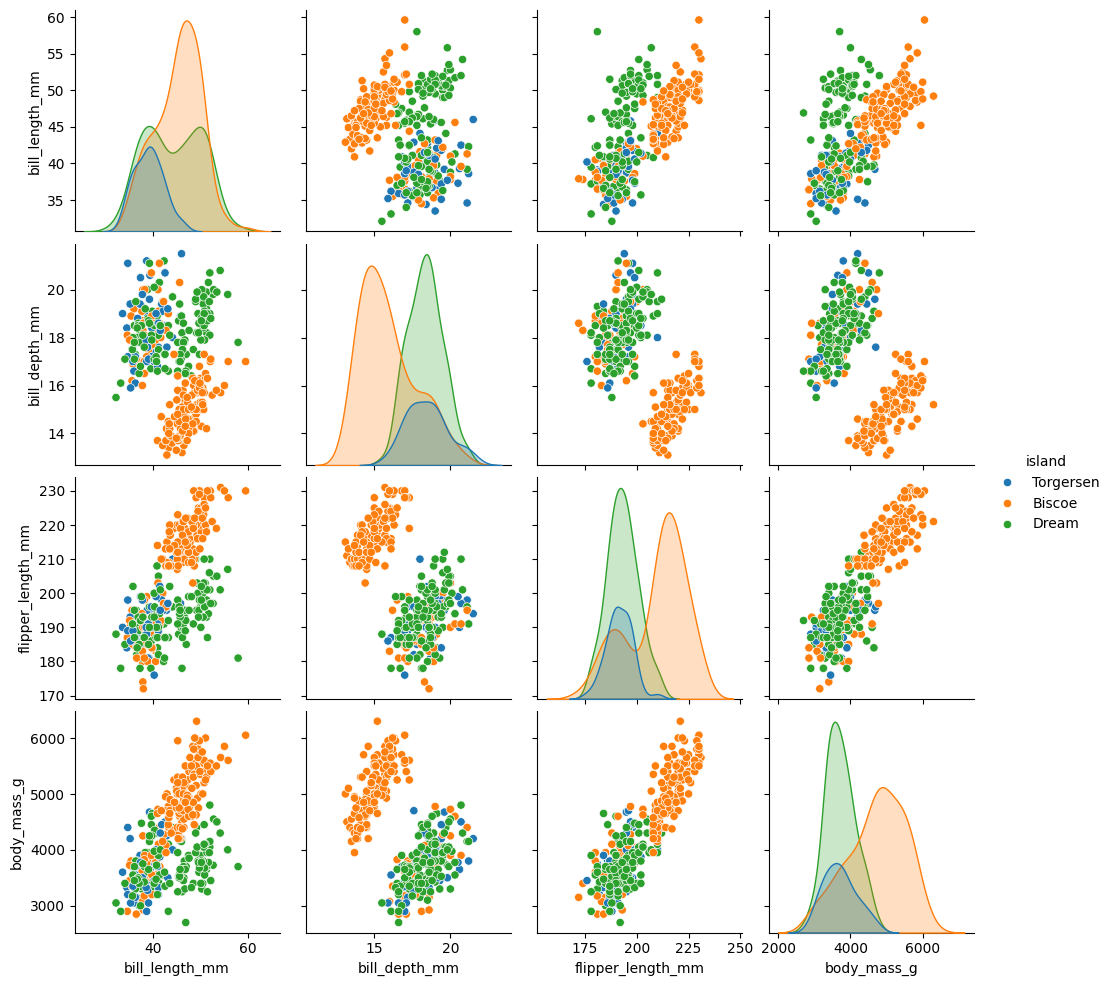

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure()
sns.pairplot(df1,hue='island')
plt.show()

Conclusions:
- Les tres espècies són clarament diferents.
- A l'espècie Chinstrap els mascles i femelles són clarament diferents. Als altres també però no de forma tan clara
- A les diferents illes trobem pingüins de les diferents espècies. Els Gentoo estàn a la illa de Biscoe

extraure les dades de features

In [6]:
df1.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [7]:
X = df1[['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']]
X.shape

(333, 4)

apliquem DBSCAN

In [30]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler() # x-mean(X)/(std(X))

XS = scaler.fit_transform(X)


print(np.min(XS,axis=0))
print(np.max(XS,axis=0))

[-2.17798729 -2.06729064 -2.06985195 -1.87443541]
[2.85822679 2.20474348 2.14602834 2.60314389]


In [35]:
clustering = DBSCAN(eps=0.5, min_samples=2).fit(XS)
grups = clustering.labels_
grups

array([ 0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  1,  0, -1,  2,  0,
        0,  0,  0,  0,  0,  0,  2,  0,  0, -1,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,
        0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,
        4,  0,  0,  0,  4,  0,  0, -1,  0,  0, -1,  0,  0, -1,  0,  0,  0,
        0, -1,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  5,  5,  5,  5,  5, -1,
        5,  3,  5,  5,  5,  5,  5,  5,  5, -1, -1,  5, -1, -1,  5, -1,  5,
        5,  5,  5,  5,  5,  6,  0, -1,  0,  5,  5, -1,  5, -1, -1,  6,  5,
        5,  5,  5,  5,  5,  5,  5, -1,  5, -1,  5,  5,  5,  0,  5,  5,  5,
        5, -1,  5,  5,  5, -1, -1,  5,  5,  5,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7

<Figure size 640x480 with 0 Axes>

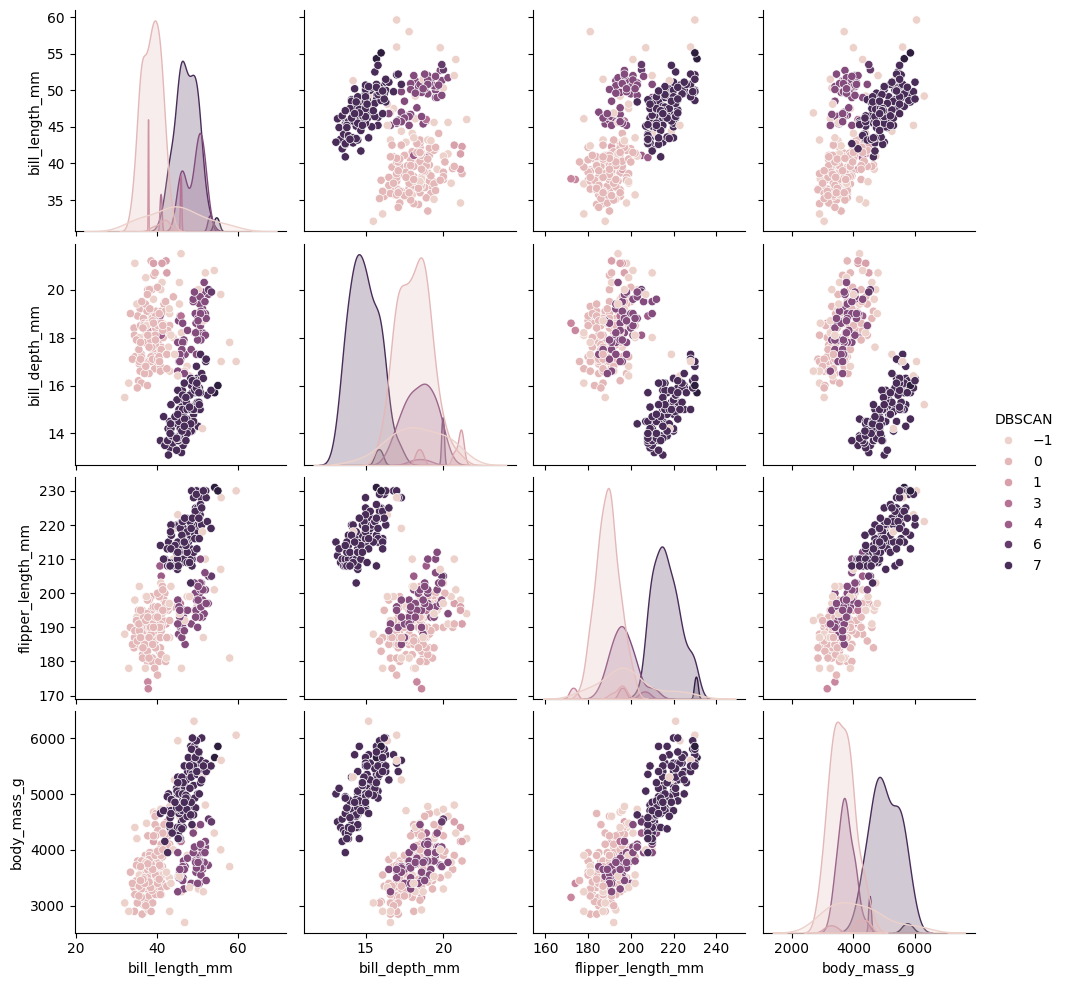

In [36]:
df3 = df1.copy()
df3['DBSCAN'] = grups

fig = plt.figure()
sns.pairplot(df3,hue='DBSCAN')
plt.show()